In [1]:
import pandas as pd
import numpy as np
import prince as pr
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('transformed_df.csv')
display(df.head())

,Question,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,...,www.yellowbrick.co,www.yourdictionary.com,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com
0,"""where does the saying keeping up with the jon...",4,3,2,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"""when did day light savings start in the us""",6,3,1,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"""what is the doll in the garden about""",2,3,3,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"""where is a unitary system of government found""",9,3,3,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"""who dies in season 2 of the originals""",2,3,1,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### We need to remove the feature columns that were originally not categorical columns in order to conduct MCA properly.

In [3]:
df.drop(columns=['Unnamed: 10', 'Question', 'Number of Sources', 'Trust Score'], inplace=True)
df.shape

(500, 1080)

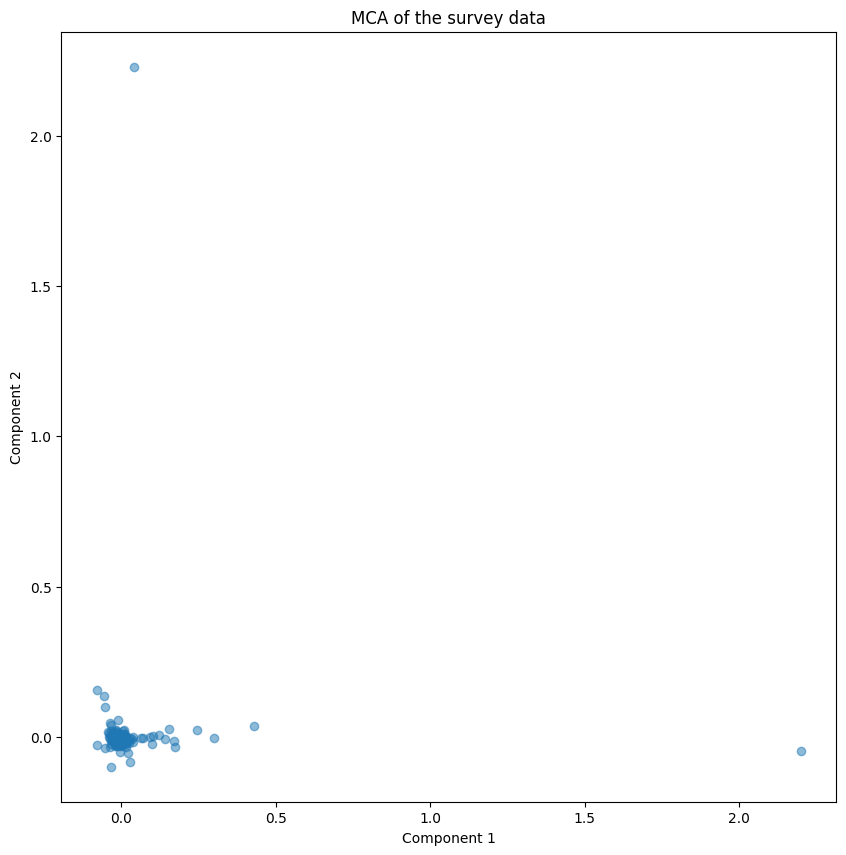

In [4]:
mca = pr.MCA(n_components=2, random_state=42)

mca_result = mca.fit_transform(df)

plt.figure(figsize=(10, 10))
plt.scatter(mca_result.iloc[:, 0], mca_result.iloc[:, 1], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA of the survey data')
plt.show()


In [5]:
# Add the MCA components to your original dataset
df['MCA_Component_1'] = mca_result.iloc[:, 0]
df['MCA_Component_2'] = mca_result.iloc[:, 1]

# Now you can inspect the original data with the added components
display(df)


,Question Category,LLM,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,2001-2009.state.gov,247sports.com,9to5study.com,...,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com,MCA_Component_1,MCA_Component_2
0,4,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.012899,0.003886
1,6,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.005048,-0.002604
2,2,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.008436,-0.007523
3,9,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.001712,0.006267
4,2,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.006151,-0.002575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.300622,-0.002363
496,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.016008,0.000389
497,6,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.034306,-0.099143
498,2,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.009575,0.000719


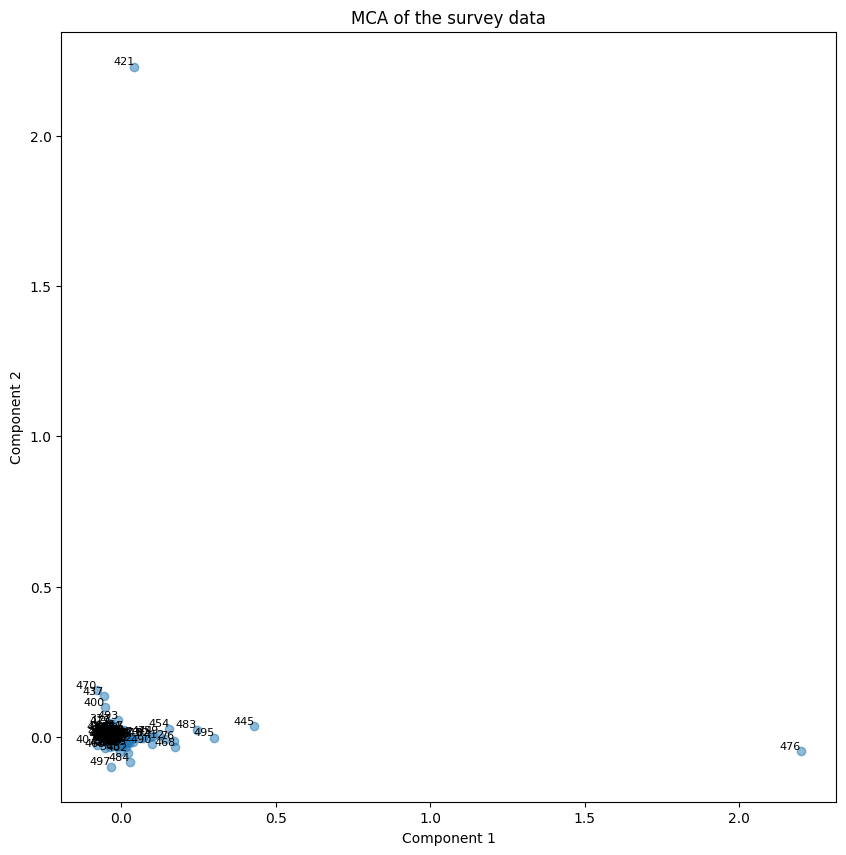

In [6]:
# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(mca_result.iloc[:, 0], mca_result.iloc[:, 1], alpha=0.5)

# Annotate each point with its original row index (or unique identifier)
for i, txt in enumerate(df.index):  # If you want to use the row index as the label
    plt.text(mca_result.iloc[i, 0], mca_result.iloc[i, 1], str(txt), fontsize=8, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA of the survey data')

# Show the plot
plt.show()

In [7]:
df.loc[[421, 476]]

,Question Category,LLM,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,2001-2009.state.gov,247sports.com,9to5study.com,...,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com,MCA_Component_1,MCA_Component_2
421,9,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.042274,2.229154
476,7,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2.199781,-0.046610


In [8]:
df_outliers_removed = df.drop(index=[421, 476], inplace=False)
display(df_outliers_removed)

,Question Category,LLM,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,2001-2009.state.gov,247sports.com,9to5study.com,...,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com,MCA_Component_1,MCA_Component_2
0,4,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.012899,0.003886
1,6,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.005048,-0.002604
2,2,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.008436,-0.007523
3,9,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.001712,0.006267
4,2,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.006151,-0.002575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.300622,-0.002363
496,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.016008,0.000389
497,6,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.034306,-0.099143
498,2,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.009575,0.000719


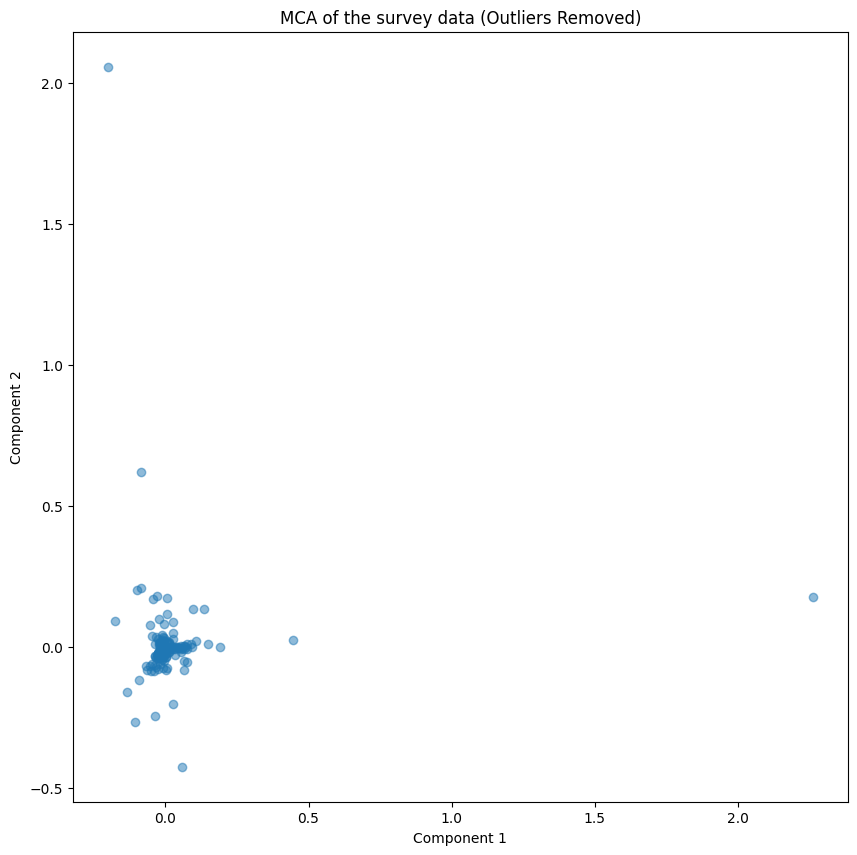

In [ ]:
mca_outliers_removed = pr.MCA(n_components=2, random_state=42)

mca_result_outliers_removed = mca_outliers_removed.fit_transform(df_outliers_removed)

plt.figure(figsize=(10, 10))
plt.scatter(mca_result_outliers_removed.iloc[:, 0], mca_result_outliers_removed.iloc[:, 1], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA of the survey data (Outliers Removed)')
plt.show()